In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [6]:
train = '/content/drive/MyDrive/tumortype/Training'
test = '/content/drive/MyDrive/tumortype/Testing'

In [ ]:
#path :

#data_path='/content/drive/MyDrive/Colab Notebooks/Data/MAJOR PROJECT/AugumentedData/'

#yes = data_path+'yes'

#no = data_path+'no'

In [7]:
#importing the vgg 19 and by default i'm using the imagenet weights 

vgg = VGG19(input_shape=IMAGE_SIZE+[3],include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [8]:
#don't train existing model
for layer in vgg.layers:
  layer.trainable=False

In [9]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/tumortype/Training/*')

In [10]:
folders

['/content/drive/MyDrive/tumortype/Training/meningioma_tumor',
 '/content/drive/MyDrive/tumortype/Training/pituitary_tumor',
 '/content/drive/MyDrive/tumortype/Training/glioma_tumor',
 '/content/drive/MyDrive/tumortype/Training/no_tumor']

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

#creating a model object
model = Model(inputs=vgg.input,outputs=prediction)

In [13]:
model.compile (loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')

In [14]:
 from keras.preprocessing.image import ImageDataGenerator

In [37]:
 train_data = ImageDataGenerator(rescale= 1/255,  shear_range=0.2,zoom_range=0.2, horizontal_flip=True)

In [38]:
 test_data = ImageDataGenerator(rescale=1/255)

In [39]:
train_final = train_data.flow_from_directory('/content/drive/MyDrive/tumortype/Training', target_size=(224,224))

Found 2870 images belonging to 4 classes.


In [40]:
test_final = test_data.flow_from_directory('/content/drive/MyDrive/tumortype/Testing', target_size=(224,224))

Found 394 images belonging to 4 classes.


In [42]:
tumor_vgg = model.fit_generator(train_final, validation_data=test_final,epochs=1, steps_per_epoch=len(train_final), validation_steps=len(test_final))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


90/90 [==============================] - 50s 552ms/step - loss: 0.1056 - accuracy: 0.9697 - val_loss: 1.8233 - val_accuracy: 0.7462


In [53]:
#saving the model 
from tensorflow.keras.models import load_model

model.save('tumor_vgg19.h5')

# *Building Predictive system*

I'm currently working on Creating an web app using streamlit or flask and once it completed I will work on deployment, which will take an image from path, which will predict whether the person has tumor or not.


**BUilding Predictive System**

In [54]:
def load_image(img_path, show = False) :
    img = image.load_img(img_path, target_size = (224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis = 0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]


    if show :
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
    return img_tensor

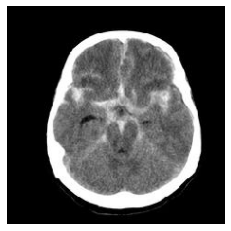

Predicted Class :  no_tumor
Actual Class :  no
Confidence :  100.0 %
_____________________________________________________________


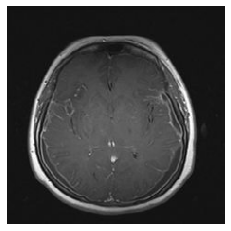

Predicted Class :  no_tumor
Actual Class :  no
Confidence :  98.64 %
_____________________________________________________________


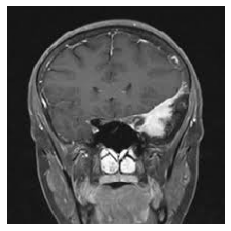

Predicted Class :  meningioma_tumor
Actual Class :  meningioma_tumor
Confidence :  90.89 %
_____________________________________________________________


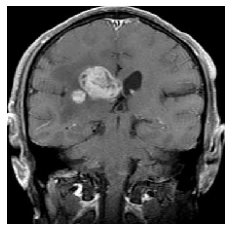

Predicted Class :  meningioma_tumor
Actual Class :  glioma_tumor
Confidence :  96.43 %
_____________________________________________________________


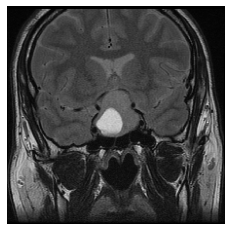

Predicted Class :  pituitary_tumor
Actual Class :  pituitary_tumor
Confidence :  100.0 %
_____________________________________________________________


In [55]:
def get_labels(test_path) : 
    # getting class labels
    from glob import glob

    class_names = []
    test_path = test_path + '/*'
    for i in glob(test_path) :  # Reads all the folders in which images are present
        class_names.append(i.split('/')[-1])

    # return dict(zip(class_names, range(len(class_names))))    # return dictionary containing class name and numeric label.
    return sorted(class_names)


if __name__ == "__main__":
    
    # load model
    model = load_model("/content/tumor_vgg19.h5", compile = False)

    # image path
    img1 = '/content/drive/MyDrive/Colab Notebooks/Data/MAJOR PROJECT/no/image(49).jpg'   
    img2 = '/content/drive/MyDrive/Colab Notebooks/Data/MAJOR PROJECT/no/image(50).jpg'
    img3 = '/content/drive/MyDrive/tumortype/Testing/meningioma_tumor/image(102).jpg'
    img4 = '/content/drive/MyDrive/tumortype/Testing/glioma_tumor/image(13).jpg'
    img5 = '/content/drive/MyDrive/tumortype/Testing/pituitary_tumor/image(15).jpg'


    class_names = get_labels('/content/drive/MyDrive/tumortype/Testing')
    for i in [img1, img2, img3, img4, img5] : 
        new_image = load_image(i, show = True)
        y_proba = model.predict(new_image)
        confidence = round(100 * (np.max(y_proba[0])), 2)
        print('Predicted Class : ', class_names[np.argmax(y_proba)])
        print('Actual Class : ', i.split('/')[-2])
        print('Confidence : ', confidence, '%')
        print('_____________________________________________________________')